Easy: Question 1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(r"C:\Users\awema\Downloads\fct_invoice.csv")
df.columns = ['invoice_no', 'customer_id', 'category', 'quantity', 'price', 'payment_method', 'invoice_date', 'shopping_mall']
print("There are", len(df['customer_id'].unique()), "unique customers in the data set.")

There are 5191 unique customers in the data set.


Easy: Question 2

In [2]:
print(df['category'].unique())
print("There are", len(df['category'].unique()), "unique category types.")

['Clothing' 'Shoes' 'Books' 'Cosmetics' 'Food & Beverage' 'Toys'
 'Technology' 'Souvenir']
There are 8 unique category types.


Easy: Question 3

In [3]:
df['payment_method'].value_counts()

print("The most common payment method was", df['payment_method'].value_counts().nlargest(1).index[0]+", used", df['payment_method'].value_counts().nlargest(1)[0], "times.")

The most common payment method was Cash, used 44447 times.


Medium: Question 1

In [4]:
print(df.groupby('category')['quantity'].sum().nlargest(3))

category
Clothing           103558
Cosmetics           45465
Food & Beverage     44277
Name: quantity, dtype: int64


Medium: Question 2

In [5]:
df2 = pd.read_json(r"C:\Users\awema\Downloads\dim_customer.json")
df2.columns = ['age','first_name','gender','id','last_name']
df3 = pd.merge(df, df2, left_on='customer_id', right_on='id')
print(df3.loc[df3['age'] > 45, 'quantity'].sum())

97629


Medium: Question 3

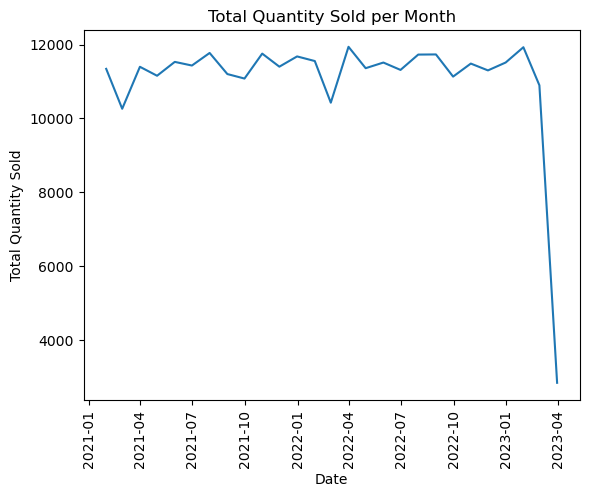

The total sales dip around February-March of every year.


In [6]:
df3['invoice_date'] = pd.to_datetime(df['invoice_date'], format='%d/%m/%Y')
monthly_sales = df3.groupby(pd.Grouper(key='invoice_date', freq='M'))['quantity'].sum()
plt.plot(monthly_sales.index, monthly_sales.values)
plt.xlabel('Date')
plt.ylabel('Total Quantity Sold')
plt.title('Total Quantity Sold per Month')
plt.xticks(rotation=90)
plt.show()

print("The total sales dip around February-March of every year.")

Hard: Question 1

In [7]:
df3['decade_age_range'] = pd.cut(df3['age'], bins=[10, 19, 29, 39, 49, 59, 69, 79, 89, 99])
df3.tail()

pivot_table = pd.pivot_table(df3, values='quantity', index='category', columns='decade_age_range', aggfunc='sum')
print(pivot_table)

decade_age_range  (10, 19]  (19, 29]  (29, 39]  (39, 49]  (49, 59]  (59, 69]  \
category                                                                       
Books                  229      1427      1518      1542      1364      1420   
Clothing              1727      9392     10247     10220      9343      9700   
Cosmetics              730      4060      4871      4460      3958      4344   
Food & Beverage        697      3906      4540      4677      3824      4243   
Shoes                  457      2716      3186      3148      2652      2696   
Souvenir               281      1304      1496      1514      1286      1307   
Technology             274      1359      1590      1553      1162      1457   
Toys                   480      2859      3217      2983      2626      2797   

decade_age_range  (69, 79]  (79, 89]  (89, 99]  
category                                        
Books                 1019       500         0  
Clothing              7055      4095         0  
Cos